<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/KMeansClustering_CustomerSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Load the dataset
# Assuming 'Mall_Customers.csv' is in the same directory or provide the full path
df = pd.read_csv('Mall_Customers.csv')
print(df.head)

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [4]:
# 2. Select features for clustering
# We will use 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# 3. Standardize the data (important for distance-based algorithms like K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


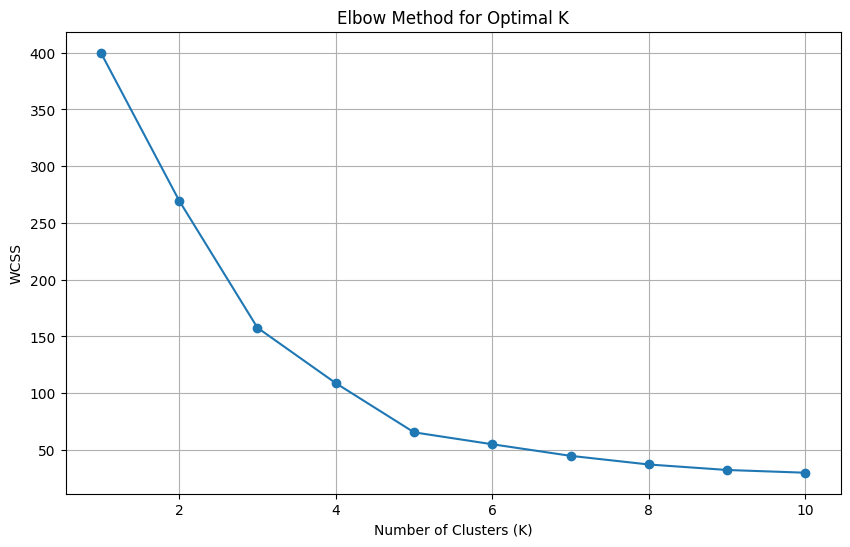

In [6]:
# 4. Determine the optimal number of clusters (k) using the Elbow Method
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
# Based on the elbow plot, assume optimal k is 5 (a common observation for this dataset)
optimal_k = 5

# 5. Apply K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

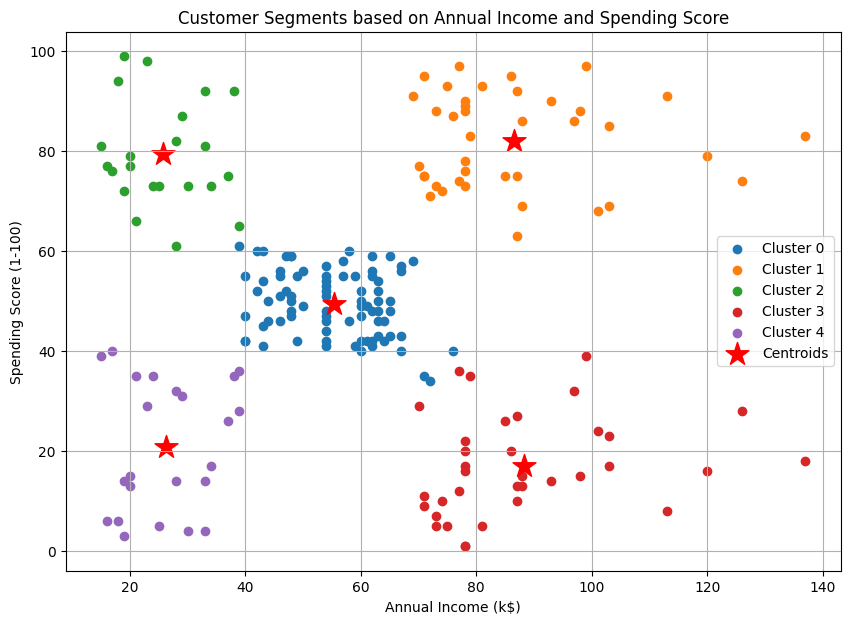

In [8]:
# 7. Visualize the clusters
plt.figure(figsize=(10, 7))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'],
                df[df['Cluster'] == i]['Spending Score (1-100)'],
                label=f'Cluster {i}')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 8. Analyze the clusters (optional)
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

print("\nMean values for each cluster:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Distribution:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Mean values for each cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
